In [1]:
pwd

'C:\\Users\\Radhika Gupta'

In [2]:
cd C:\Users\Radhika Gupta\OneDrive\Documents\

C:\Users\Radhika Gupta\OneDrive\Documents


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
df = pd.read_csv('data.csv')
print(df)

       age  sex  chest pain  resting blood pressure  \
0       57  1.0         3.0                   145.0   
1       64  0.0         2.0                   130.0   
2       52  1.0         1.0                   130.0   
3       56  0.0         1.0                   120.0   
4       66  0.0         0.0                   120.0   
...    ...  ...         ...                     ...   
26822   56  1.0         3.0                   110.0   
26823   41  1.0         3.0                   150.0   
26824   81  0.0         2.0                   120.0   
26825   70  0.0         2.0                   120.0   
26826   67  0.0         1.0                   130.0   

       serum cholestrol in mg/dl  fbs  resting ECG results   \
0                          233.0  1.0                   0.0   
1                          250.0  0.0                   1.0   
2                          204.0  0.0                   0.0   
3                          236.0  0.0                   1.0   
4                       

In [4]:
print("Null values in the dataset")
print(df.isnull().sum())

Null values in the dataset
age                                       0
sex                                      39
chest pain                               12
resting blood pressure                   37
serum cholestrol in mg/dl                62
fbs                                      87
resting ECG results                      91
maximun heart rate achieved              42
exercise induced angina (1:yes, 0:no)    53
oldpeak                                  32
slope                                    21
ca                                       46
thal                                     50
target                                   17
dtype: int64


In [5]:
df.dropna(inplace=True)
x = df.drop('target' , axis=1)
y = df['target']
print(df)

       age  sex  chest pain  resting blood pressure  \
0       57  1.0         3.0                   145.0   
1       64  0.0         2.0                   130.0   
2       52  1.0         1.0                   130.0   
3       56  0.0         1.0                   120.0   
4       66  0.0         0.0                   120.0   
...    ...  ...         ...                     ...   
26822   56  1.0         3.0                   110.0   
26823   41  1.0         3.0                   150.0   
26824   81  0.0         2.0                   120.0   
26825   70  0.0         2.0                   120.0   
26826   67  0.0         1.0                   130.0   

       serum cholestrol in mg/dl  fbs  resting ECG results   \
0                          233.0  1.0                   0.0   
1                          250.0  0.0                   1.0   
2                          204.0  0.0                   0.0   
3                          236.0  0.0                   1.0   
4                       

In [6]:
print("Null values in the dataset:")
print(df.isnull().sum())

Null values in the dataset:
age                                      0
sex                                      0
chest pain                               0
resting blood pressure                   0
serum cholestrol in mg/dl                0
fbs                                      0
resting ECG results                      0
maximun heart rate achieved              0
exercise induced angina (1:yes, 0:no)    0
oldpeak                                  0
slope                                    0
ca                                       0
thal                                     0
target                                   0
dtype: int64


In [7]:
x = df.drop('target', axis=1)
y = df['target']

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2,random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LogisticRegression(random_state = 42)
model.fit(x_train_scaled , y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.86

Confusion Matrix:
 [[1850  523]
 [ 211 2731]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      2373
         1.0       0.84      0.93      0.88      2942

    accuracy                           0.86      5315
   macro avg       0.87      0.85      0.86      5315
weighted avg       0.87      0.86      0.86      5315



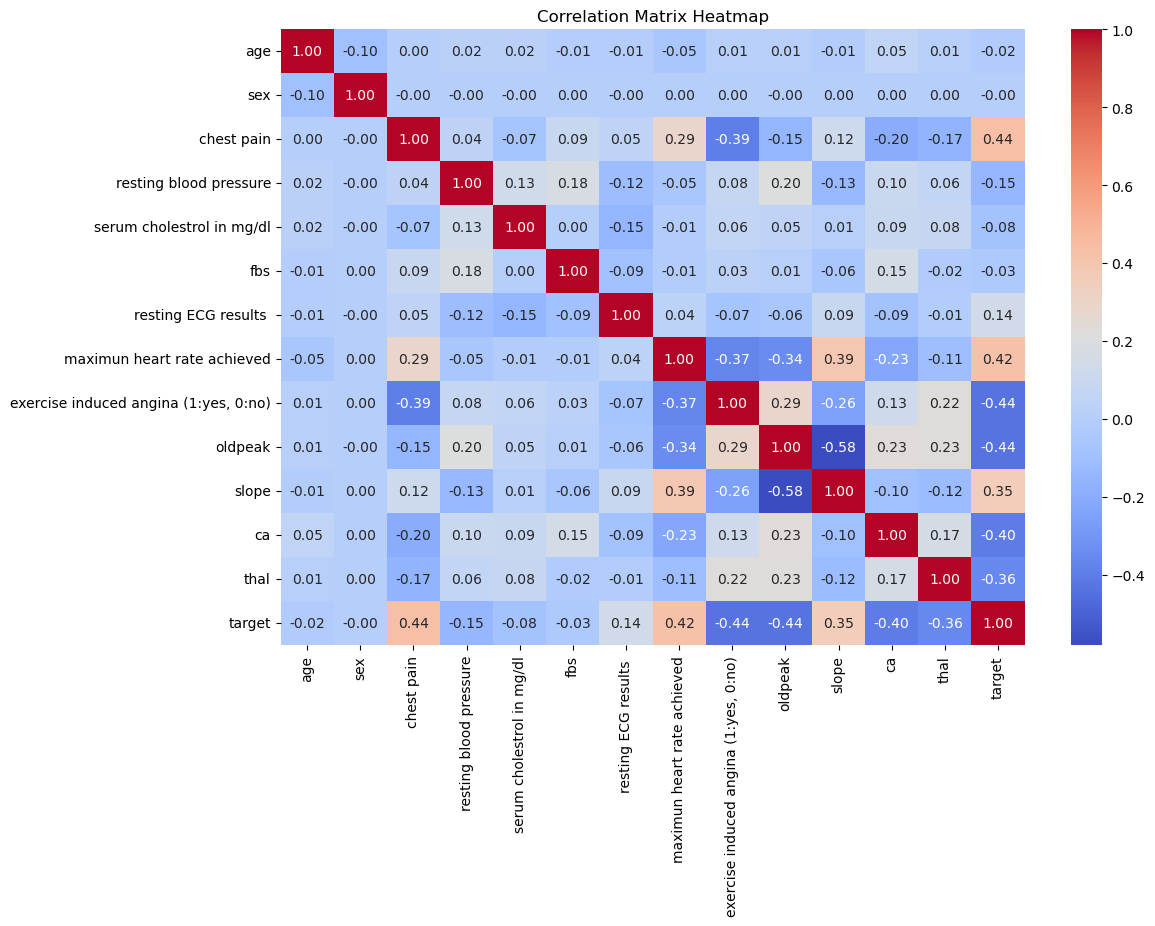

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm' , fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
target_correlation = corr_matrix['target'].sort_values(ascending=False)

In [11]:
print("Variables with the highest correlation with 'target':")
print(target_correlation)

Variables with the highest correlation with 'target':
target                                   1.000000
chest pain                               0.435361
maximun heart rate achieved              0.420469
slope                                    0.352024
resting ECG results                      0.138226
sex                                     -0.000587
age                                     -0.022856
fbs                                     -0.033414
serum cholestrol in mg/dl               -0.083259
resting blood pressure                  -0.148590
thal                                    -0.358887
ca                                      -0.404965
exercise induced angina (1:yes, 0:no)   -0.438249
oldpeak                                 -0.439435
Name: target, dtype: float64


Visualization of Chest Pain and its relationship with Target


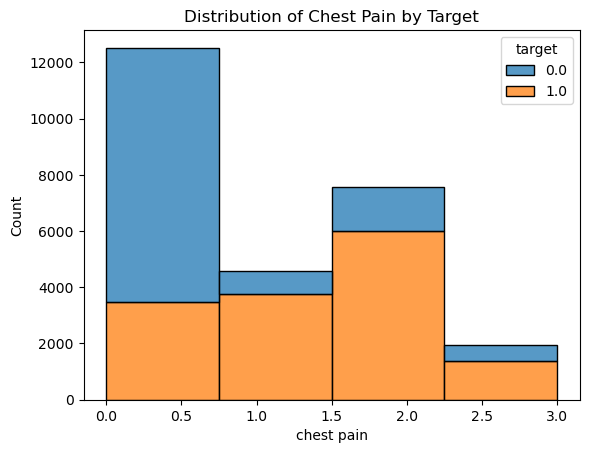

Visualization of Slope and its relationship with Target


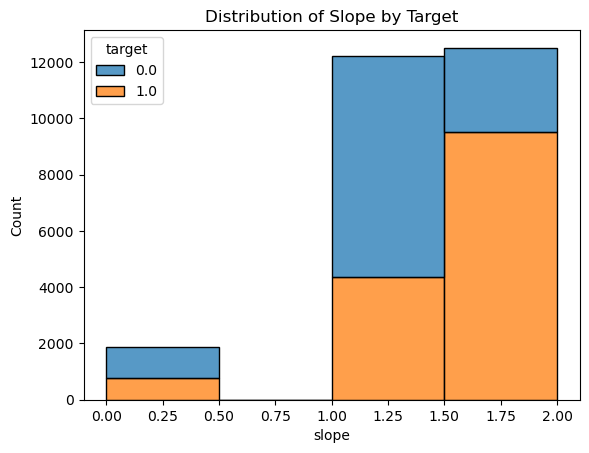

In [12]:
sns.histplot(data=df , x='chest pain' , hue = 'target' , multiple='stack' , bins=4)
plt.title('Distribution of Chest Pain by Target')
print('Visualization of Chest Pain and its relationship with Target')
plt.show()
      
sns.histplot(data=df , x='slope' , hue = 'target' , multiple='stack' , bins=4)
plt.title('Distribution of Slope by Target')
print('Visualization of Slope and its relationship with Target')
plt.show()
      

Visualization of Maximum Heart Rate Achieved and its Relationship with Target


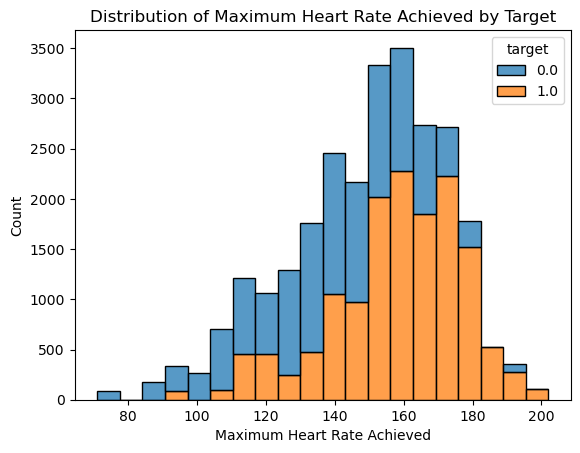

In [13]:
sns.histplot(data=df, x='maximun heart rate achieved', hue='target', multiple='stack', bins=20)
plt.title('Distribution of Maximum Heart Rate Achieved by Target')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
print('Visualization of Maximum Heart Rate Achieved and its Relationship with Target')
plt.show()

In [14]:
pip install nbconvert[webpdf]

                                              0.0/83.4 kB ? eta -:--:--
     ---------------------------------------  81.9/83.4 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 83.4/83.4 kB 1.2 MB/s eta 0:00:00
                                              0.0/101.4 kB ? eta -:--:--
     ---------------------------             71.7/101.4 kB 2.0 MB/s eta 0:00:01
     -----------------------------------     92.2/101.4 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 101.4/101.4 kB 970.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Visualization of Exercise-induced angina and its relationship with Target


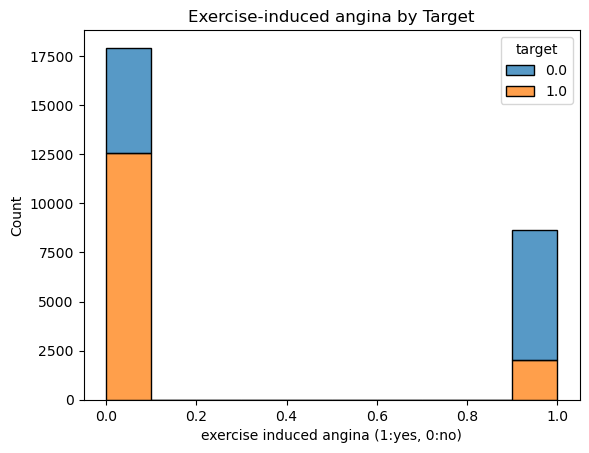

Visualization of Oldpeak and its relationship with Target


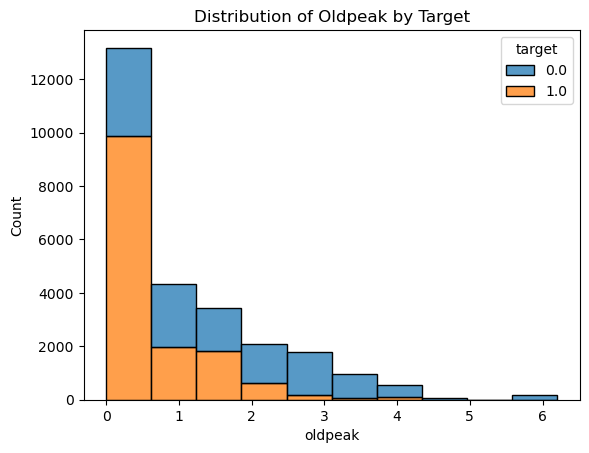

Visualization of CA and its relationship with Target


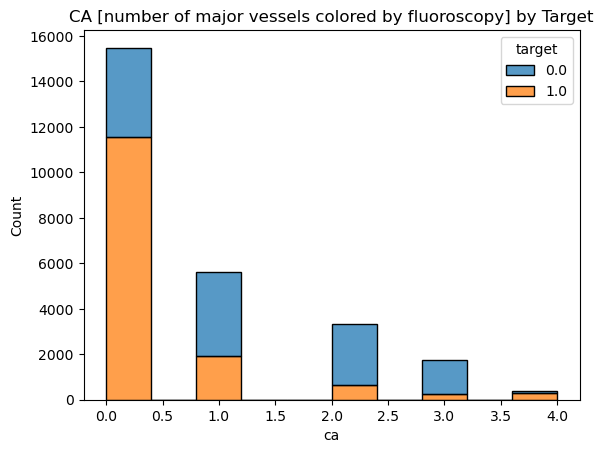

In [17]:
sns.histplot(data=df , x='exercise induced angina (1:yes, 0:no)' , hue = 'target' , multiple='stack' , bins=10)
plt.title('Exercise-induced angina by Target')
print('Visualization of Exercise-induced angina and its relationship with Target')
plt.show()
      
sns.histplot(data=df , x='oldpeak' , hue = 'target' , multiple='stack' , bins=10)
plt.title('Distribution of Oldpeak by Target')
print('Visualization of Oldpeak and its relationship with Target')
plt.show()

sns.histplot(data=df , x='ca' , hue = 'target' , multiple='stack' , bins=10)
plt.title('CA [number of major vessels colored by fluoroscopy] by Target')
print('Visualization of CA and its relationship with Target')
plt.show()

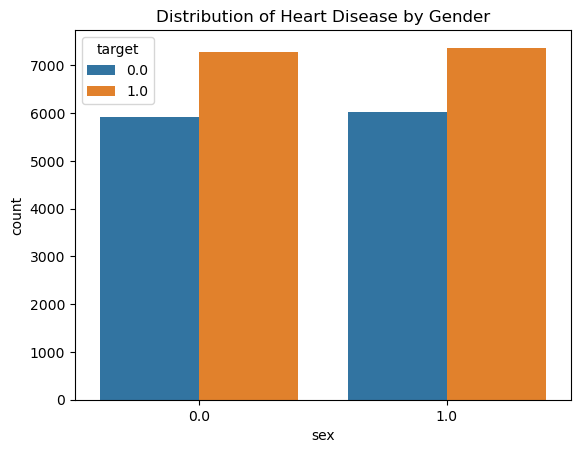

In [18]:
sns.countplot(x='sex', data=df, hue='target')
plt.title('Distribution of Heart Disease by Gender')
plt.show()

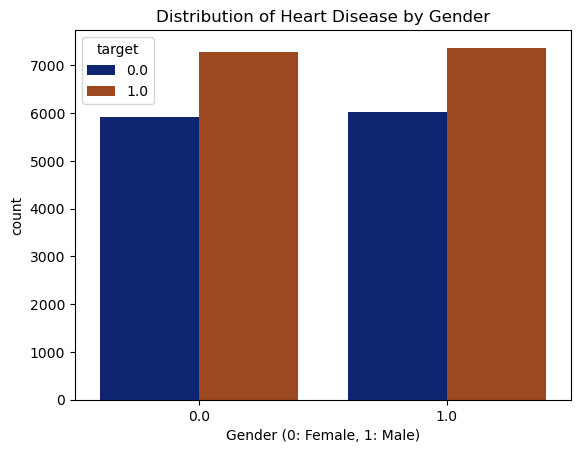

In [26]:
sns.countplot(x='sex', data=df, hue='target', palette='dark')
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.show()


In [25]:
male_heart_disease = df[(df['sex'] == 1) & (df['target'] == 1)].shape[0]
female_heart_disease = df[(df['sex'] == 0) & (df['target'] == 1)].shape[0]
total_males = df[df['sex'] == 1].shape[0]
total_females = df[df['sex'] == 0].shape[0]
print(f"Percentage of males with heart disease: {100 * male_heart_disease / total_males:.2f}%")
print(f"Percentage of females with heart disease: {100 * female_heart_disease / total_females:.2f}%")

Percentage of males with heart disease: 55.05%
Percentage of females with heart disease: 55.11%


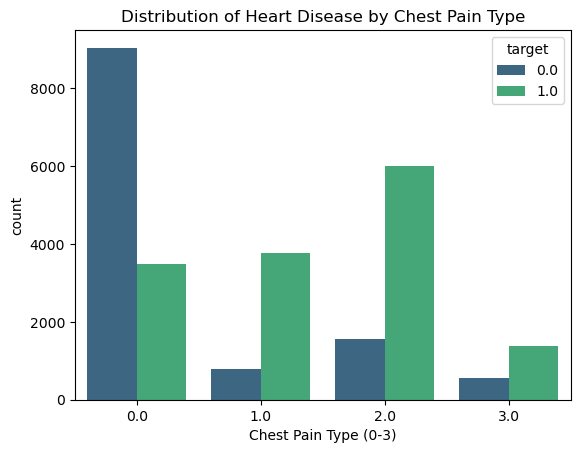

Percentage of individuals with Chest Pain Type 0 and heart disease: 27.81%
Percentage of individuals with Chest Pain Type 1 and heart disease: 82.74%
Percentage of individuals with Chest Pain Type 2 and heart disease: 79.40%
Percentage of individuals with Chest Pain Type 3 and heart disease: 71.38%


In [27]:
# Analyze chest pain types with vibrant colors
sns.countplot(x='chest pain', data=df, hue='target', palette='viridis')
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type (0-3)')
plt.show()

for i in range(4):  
    total_with_pain = df[df['chest pain'] == i].shape[0]
    with_heart_disease = df[(df['chest pain'] == i) & (df['target'] == 1)].shape[0]
    
    percentage_with_heart_disease = 100 * with_heart_disease / total_with_pain if total_with_pain > 0 else 0
    
    print(f"Percentage of individuals with Chest Pain Type {i} and heart disease: {percentage_with_heart_disease:.2f}%")

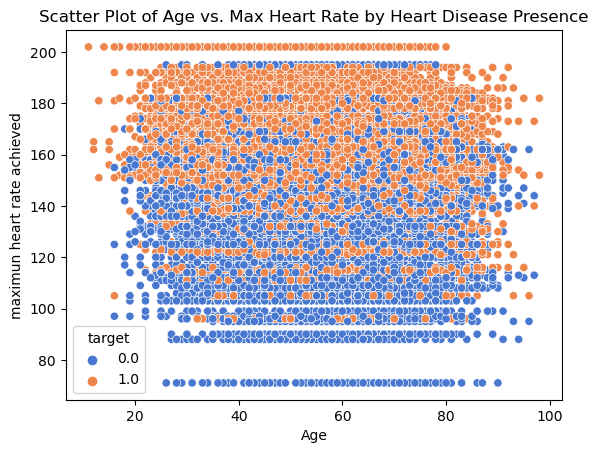

Average Age with Heart Disease: 55.36
Average Max Heart Rate with Heart Disease: 158.39

Average Age without Heart Disease: 56.06
Average Max Heart Rate without Heart Disease: 139.07


In [30]:
sns.scatterplot(x='age', y='maximun heart rate achieved', data=df, hue='target', palette='muted')
plt.title('Scatter Plot of Age vs. Max Heart Rate by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('maximun heart rate achieved')
plt.show()

with_heart_disease = df[df['target'] == 1]
without_heart_disease = df[df['target'] == 0]

avg_age_with_heart_disease = with_heart_disease['age'].mean()
avg_max_heart_rate_with_heart_disease = with_heart_disease['maximun heart rate achieved'].mean()

avg_age_without_heart_disease = without_heart_disease['age'].mean()
avg_max_heart_rate_without_heart_disease = without_heart_disease['maximun heart rate achieved'].mean()

print(f"Average Age with Heart Disease: {avg_age_with_heart_disease:.2f}")
print(f"Average Max Heart Rate with Heart Disease: {avg_max_heart_rate_with_heart_disease:.2f}\n")
print(f"Average Age without Heart Disease: {avg_age_without_heart_disease:.2f}")
print(f"Average Max Heart Rate without Heart Disease: {avg_max_heart_rate_without_heart_disease:.2f}")

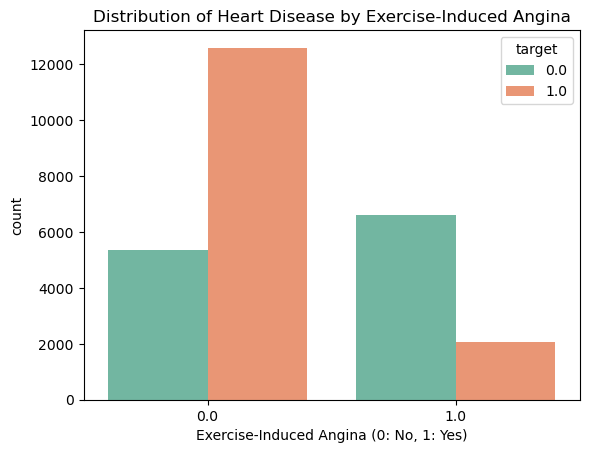

Percentage of individuals without exercise-induced angina and with heart disease: 70.22%
Percentage of individuals with exercise-induced angina and with heart disease: 23.68%


In [33]:
sns.countplot(x='exercise induced angina (1:yes, 0:no)', data=df, hue='target', palette='Set2')
plt.title('Distribution of Heart Disease by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.show()

total_no_angina = df[df['exercise induced angina (1:yes, 0:no)'] == 0].shape[0]
total_with_angina = df[df['exercise induced angina (1:yes, 0:no)'] == 1].shape[0]

with_heart_disease_no_angina = df[(df['exercise induced angina (1:yes, 0:no)'] == 0) & (df['target'] == 1)].shape[0]
with_heart_disease_with_angina = df[(df['exercise induced angina (1:yes, 0:no)'] == 1) & (df['target'] == 1)].shape[0]

percentage_with_heart_disease_no_angina = 100 * with_heart_disease_no_angina / total_no_angina if total_no_angina > 0 else 0
percentage_with_heart_disease_with_angina = 100 * with_heart_disease_with_angina / total_with_angina if total_with_angina > 0 else 0

print(f"Percentage of individuals without exercise-induced angina and with heart disease: {percentage_with_heart_disease_no_angina:.2f}%")
print(f"Percentage of individuals with exercise-induced angina and with heart disease: {percentage_with_heart_disease_with_angina:.2f}%")

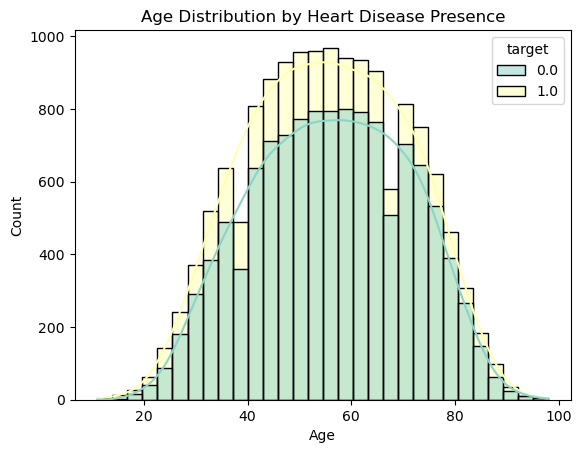

Average Age with Heart Disease: 55.36
Average Age without Heart Disease: 56.06


In [34]:
sns.histplot(x='age', data=df, hue='target', kde=True, bins=30, palette='Set3')
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Age')
plt.show()

with_heart_disease = df[df['target'] == 1]
without_heart_disease = df[df['target'] == 0]

avg_age_with_heart_disease = with_heart_disease['age'].mean()
avg_age_without_heart_disease = without_heart_disease['age'].mean()

print(f"Average Age with Heart Disease: {avg_age_with_heart_disease:.2f}")
print(f"Average Age without Heart Disease: {avg_age_without_heart_disease:.2f}")